In [5]:
import numpy as np 
import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np

In [1]:
import numpy as np 

def parse_line(line):
    return np.array(list(line)) == ord('#')

terrain = np.loadtxt("input.txt",
    dtype=bool, comments=None, delimiter='\n', converters={0: parse_line}
)

# print(terrain.astype(int))

def make_path(slope):
    right, down = slope
    path = np.zeros_like(terrain, dtype=bool)
    col = 0
    for row in range(len(terrain)):
        if row % down != 0:
            continue
        path[row, col] = True
        col = (col + right) % terrain.shape[1]
    return path

def count_collisions(path):
    return np.count_nonzero(path & terrain) 

slopes = [(1, 1), (3, 1), (5, 1), (7, 1), (1, 2)]

paths = map(make_path, slopes)

path_collisions = [*map(count_collisions, paths)]

for i in range(len(slopes)):
    # print(path.astype(int))
    print("Collisions at {} slope: {}".format(slopes[i], path_collisions[i]))

print("Product: {}".format(np.product(path_collisions)))


Collisions at (1, 1) slope: 68
Collisions at (3, 1) slope: 203
Collisions at (5, 1) slope: 78
Collisions at (7, 1) slope: 77
Collisions at (1, 2) slope: 40
Product: 3316272960


['Text',
 array([[1, 2],
        [3, 4]]),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 [(1,
   array([[0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
          [0, 1, 1, 0, 0, 1, 1, 1, 0, 1],
          [0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
          [0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
          [1, 1, 0, 1, 1, 0, 0, 0, 1, 1],
          [1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
          [0, 0, 0, 1, 1, 1, 0, 0, 0, 1],
          [1, 1, 1, 1, 0, 1, 1, 0, 0, 1],
          [1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
          [1, 1, 1, 1, 1, 1, 1, 0, 1, 0]])),
  (2,
   array([[0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
          [0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
          [0, 1, 1, 1, 0, 0, 1, 0, 0, 1],
          [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
          [0, 0, 0, 0, 1, 1, 1, 0, 0, 1],
          [0, 1, 1, 0, 1, 0, 1, 0, 0, 0],
          [1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
          [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
          [1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
          [1, 0, 1, 0, 1, 0, 0, 0, 0, 1]])),
  (3,
   array([[0, 1, 0, 1, 1, 0, 0, 1, 1, 1],
          [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
          [1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
          [1, 1, 1, 0, 0, 1, 1, 1, 0, 1],
          [1, 1, 1, 0, 1, 0, 0, 1, 0, 1],
          [0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
          [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
          [0, 0, 0, 1, 0, 1, 1, 1, 0, 1],
          [0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
          [1, 0, 0, 0, 1, 0, 1, 1, 1, 1]]))]]
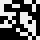
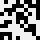
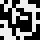

In [6]:
import html
html_formatter = get_ipython().display_formatter.formatters['text/html']

def bool_array_to_image(a, fmt='png'):
    a = 240 - (a.astype(np.uint8) * 240)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    return IPython.display.Image(data=f.getvalue())

def double_bitmap(a):
    (h, w) = a.shape
    return np.tile(a.reshape((-1, 1)), 2).reshape((h, w*2))

def quad_bitmap(a):
    return double_bitmap(double_bitmap(a).T).T

def ndarray_to_html(a):
    if len(a.shape) == 2 and a.max() <= 1 and a.min() >= 0:
        while a.size < 1024:
            a = quad_bitmap(a)
        
        for bundle in bool_array_to_image(a)._repr_mimebundle_():
            for mimetype, b64value in bundle.items():
                if mimetype.startswith('image/'):
                    src = f'data:{mimetype};base64,{b64value}'
                    return f'<img src="{src}">'
    else:
        return "<pre>{}</pre>".format(html.escape(repr(a)))

html_formatter.for_type(np.ndarray, ndarray_to_html)

def item_to_html(item):
    formatter = html_formatter.for_type(type(item))
    if callable(formatter):
        item = formatter(item)

    if callable(getattr(item, '_repr_mimebundle_', None)):
        for bundle in item._repr_mimebundle_():
            for mimetype, b64value in bundle.items():
                if mimetype.startswith('image/'):
                    src = f'data:{mimetype};base64,{b64value}'
                    return f'<img src={src}>'
    
    if not formatter:
        item = '<tt>{}</tt>'.format(html.escape(repr(item)))
    return f'<span style="margin-left:0.2em">{item}</span>'

def list_to_html(l):
    items = [item_to_html(item) for item in l]
    return '<tt style="display:flex;flex-wrap:wrap;align-items:center">[{}]</tt>'.format(', '.join(items))

html_formatter.for_type(list, list_to_html)

def tuple_to_html(l):
    items = (item_to_html(item) for item in l)
    return '<tt style="display:flex;flex-wrap:wrap;align-items:center">({})</tt>'.format(', '.join(items))

html_formatter.for_type(tuple, tuple_to_html)

["Text", np.array([[1,2],[3,4]]), np.eye(10), [(i, np.random.randint(0,2,(10,10))) for i in range(1,4)]]

In [7]:
terrain

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [ True,  True,  True, ..., False,  True, False],
       [False,  True, False, ..., False, False, False]])

In [9]:
make_path((3,1))

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]])